<a href="https://colab.research.google.com/github/2303a52163/EXPLAINABLE-AI-LAB-PRACTICAL/blob/main/Plant_Disease_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
saroz014_plant_diseases_path = kagglehub.dataset_download('saroz014/plant-diseases')

print('Data source import complete.')


Using Colab cache for faster access to the 'plant-diseases' dataset.
Data source import complete.


In [ ]:
#data reading and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import keras

In [ ]:
dir = glob('/kaggle/input/plant-diseases/dataset_itr2/train/*')
dir

['/kaggle/input/plant-diseases/dataset_itr2/train/Tomato___Late_blight',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Tomato___healthy',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Grape___healthy',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Orange___Haunglongbing_(Citrus_greening)',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Soybean___healthy',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Squash___Powdery_mildew',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Potato___healthy',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Corn_(maize)___Northern_Leaf_Blight',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Tomato___Early_blight',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Tomato___Septoria_leaf_spot',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Strawberry___Leaf_scorch',
 '/kaggle/input/plant-diseases/dataset_itr2/train/Peach___he

In [ ]:
import kagglehub
path = kagglehub.dataset_download('saroz014/plant-diseases')
print('✅ Data source import complete:', path)

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# XAI
import shap
from sklearn.inspection import PartialDependenceDisplay


Using Colab cache for faster access to the 'plant-diseases' dataset.
✅ Data source import complete: /kaggle/input/plant-diseases


In [ ]:
import glob
import os

# List all CSV files in the downloaded dataset directory
csv_files = glob.glob(os.path.join(path, '*.csv'))
print("Found CSV files in the dataset directory:")
for csv_file in csv_files:
    print(csv_file)

Found CSV files in the dataset directory:


In [ ]:
import os

print("Dataset path:", path)
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


Streaming output truncated to the last 5000 lines.
/root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/dataset_itr2/test/Grape___Black_rot/6e4dfd43-4d68-4c5e-8580-8caa165107a8___FAM_B.Rot 0398.JPG
/root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/dataset_itr2/test/Grape___Black_rot/0cf5d61f-fb1a-4533-b0aa-f174d2acdc82___FAM_B.Rot 0721_90degFlipLR.JPG
/root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/dataset_itr2/test/Grape___Black_rot/3b840038-8831-4158-ab4a-8eeee954d136___FAM_B.Rot 3307_90degFlipTB.JPG
/root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/dataset_itr2/test/Grape___Black_rot/0e143d33-adc0-41af-92e2-d0bb712d7b72___FAM_B.Rot 5047_90degFlipLR.JPG
/root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/dataset_itr2/test/Grape___Black_rot/2e875c76-45f3-48f9-b678-f2282da11408___FAM_B.Rot 3101.JPG
/root/.cache/kagglehub/datasets/saroz014/pl

In [ ]:
import os
from PIL import Image

for root, dirs, files in os.walk(path):
    for file in files:
        fpath = os.path.join(root, file)
        try:
            with Image.open(fpath) as img:
                img.verify()
        except Exception:
            print("🗑️ Removing corrupted file:", fpath)
            os.remove(fpath)


🗑️ Removing corrupted file: /root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/train/Pepper,_bell___Bacterial_spot/.directory
🗑️ Removing corrupted file: /root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/train/Tomato___Late_blight/.directory
🗑️ Removing corrupted file: /root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/train/Pepper,_bell___healthy/.directory
🗑️ Removing corrupted file: /root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/train/Tomato___healthy/.directory
🗑️ Removing corrupted file: /root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/train/Apple___Apple_scab/.directory
🗑️ Removing corrupted file: /root/.cache/kagglehub/datasets/saroz014/plant-diseases/versions/1/dataset_itr2/test/Orange___Haunglongbing_(Citrus_greening)/3b54aef1-a072-4573-b081-ea8c133b0acb___CREC_HLB 6618_90degFlipTB.JPG
🗑️ Removing corrupted file: /root/.cache/k

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 344676 images belonging to 1 classes.
Found 86168 images belonging to 1 classes.


Total classes: 38
Tomato___Spider_mites Two-spotted_spider_mite: 5364 images
Corn_(maize)___Common_rust_: 3816 images
Tomato___Early_blight: 3200 images
Pepper,_bell___Bacterial_spot: 3192 images
Tomato___Late_blight: 6108 images
Orange___Haunglongbing_(Citrus_greening): 17624 images
Peach___Bacterial_spot: 7352 images
Pepper,_bell___healthy: 4724 images
Grape___Esca_(Black_Measles): 4428 images
Tomato___Tomato_mosaic_virus: 1196 images
Potato___Early_blight: 3200 images
Corn_(maize)___healthy: 3720 images
Tomato___Bacterial_spot: 6808 images
Squash___Powdery_mildew: 5872 images
Apple___Black_rot: 1988 images
Strawberry___Leaf_scorch: 3552 images
Peach___healthy: 1152 images
Raspberry___healthy: 1188 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 17144 images
Soybean___healthy: 16288 images
Strawberry___healthy: 1460 images
Tomato___Leaf_Mold: 3048 images
Corn_(maize)___Northern_Leaf_Blight: 3152 images
Tomato___Septoria_leaf_spot: 5668 images
Apple___Cedar_apple_rust: 880 images
Potat

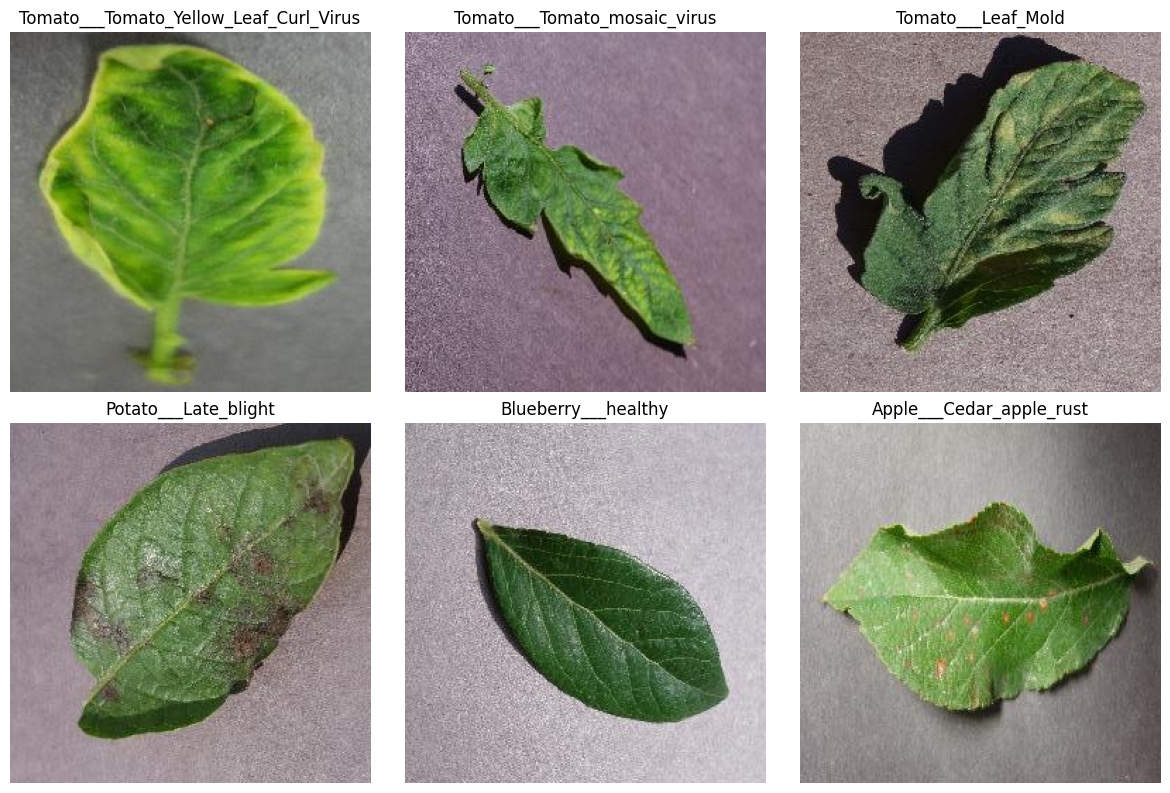

In [ ]:
# Count number of images per class
import os

# Update the path to list directories within the train directory
train_dir = os.path.join(path, 'dataset_itr2/train/')
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
print(f"Total classes: {len(classes)}")
# Print counts for all classes
for c in classes:
    print(f"{c}: {len(os.listdir(os.path.join(train_dir, c)))} images")

# Display sample images
import random
plt.figure(figsize=(12, 8))
# Ensure we don't sample more classes than exist
num_samples = min(6, len(classes))
for i, cls in enumerate(random.sample(classes, num_samples)):
    cls_path = os.path.join(train_dir, cls)
    img_file = random.choice(os.listdir(cls_path))
    img = plt.imread(os.path.join(cls_path, img_file))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 347527 images belonging to 1 classes.
Found 86881 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory(path, target_size=(128,128),
                                        batch_size=32, class_mode='categorical',
                                        subset='training')


Found 344676 images belonging to 1 classes.


In [ ]:
train_gen = datagen.flow_from_directory(
    path,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',  # 👈 use binary
    subset='training'
)

val_gen = datagen.flow_from_directory(
    path,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',  # 👈 use binary
    subset='validation'
)


Found 344676 images belonging to 1 classes.
Found 86168 images belonging to 1 classes.


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    # 👇 use 1 neuron + sigmoid for binary classification
    layers.Dense(1, activation='sigmoid')
])

cnn.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])
cnn.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_55
Received: inputs=['Tensor(shape=(30, 128, 128, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_55
Received: inputs=['Tensor(shape=(60, 128, 128, 3))']
  warnings.warn(msg)


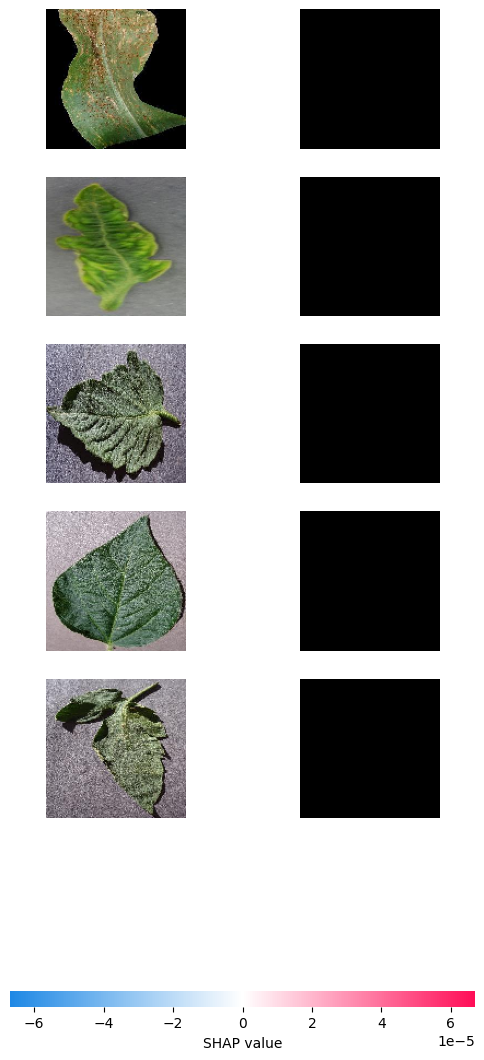

In [ ]:
#shap
background = next(iter(train_gen))[0][:30]
explainer = shap.DeepExplainer(cnn, background)
shap_values = explainer.shap_values(background[:5])

# plot SHAP explanations
shap.image_plot(shap_values, background[:5])


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

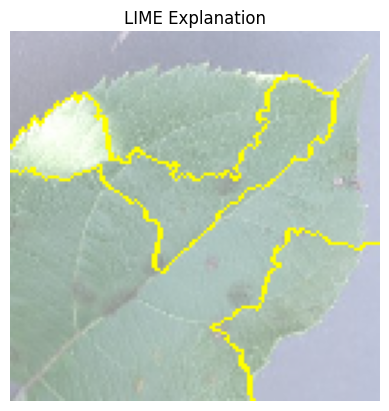

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image=img_array[0].astype('double'),
    classifier_fn=lambda x: cnn.predict(x),
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")
plt.show()
